In [23]:
import numpy as np 
import pandas as pd 
import re

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import spacy

from PIL import Image

from textblob import TextBlob

## Data Exploration

In [24]:
df = pd.read_csv('resources/DisneylandReviews.csv', encoding="cp1252")

df

Review_ID  Rating Year_Month     Reviewer_Location  \
0      670772142       4     2019-4             Australia   
1      670682799       4     2019-5           Philippines   
2      670623270       4     2019-4  United Arab Emirates   
3      670607911       4     2019-4             Australia   
4      670607296       4     2019-4        United Kingdom   
...          ...     ...        ...                   ...   
42651    1765031       5    missing        United Kingdom   
42652    1659553       5    missing                Canada   
42653    1645894       5    missing          South Africa   
42654    1618637       4    missing         United States   
42655    1536786       4    missing        United Kingdom   

                                             Review_Text               Branch  
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1      Its been a while since d last time we visit HK...  Disneyland_HongKong  
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4      the location is not in the city, took around 1...  Disneyland_HongKong  
...                                                  ...                  ...  
42651  i went to disneyland paris in july 03 and thou...     Disneyland_Paris  
42652  2 adults and 1 child of 11 visited Disneyland ...     Disneyland_Paris  
42653  My eleven year old daughter and myself went to...     Disneyland_Paris  
42654  This hotel, part of the Disneyland Paris compl...     Disneyland_Paris  
42655  I went to the Disneyparis resort, in 1996, wit...     Disneyland_Paris  

[42656 rows x 6 columns]

In [25]:
len(df['Review_ID'].unique())

42636

What does the data means?

Review_ID: Unique reviewer id? as there seems to be duplicate so I would assume that this denotes reviewer.

Rating: Between 1 to 5

Year_Month: Year and Month of this review

Reviewer_Location: Where the reviewer is from

Review_Text: The full text review

Branch: Which Disney Land is being reviewed

In [26]:
missing_df=df.loc[df['Year_Month']=='missing']
missing_df

Review_ID  Rating Year_Month Reviewer_Location  \
269    647038712       4    missing       Philippines   
282    646466731       3    missing         Singapore   
622    620580249       3    missing            Canada   
5347   318799221       4    missing         Australia   
5799   284745152       5    missing       Philippines   
...          ...     ...        ...               ...   
42651    1765031       5    missing    United Kingdom   
42652    1659553       5    missing            Canada   
42653    1645894       5    missing      South Africa   
42654    1618637       4    missing     United States   
42655    1536786       4    missing    United Kingdom   

                                             Review_Text               Branch  
269    The first thing on our agenda when we finished...  Disneyland_HongKong  
282    Brought mum for the first time to Disneyland w...  Disneyland_HongKong  
622    I have been to Tokyo and LA Disneyland!I also ...  Disneyland_HongKong  
5347   We pre bought tickets at the hotel (same price...  Disneyland_HongKong  
5799   Disneyland is indeed the most magical place in...  Disneyland_HongKong  
...                                                  ...                  ...  
42651  i went to disneyland paris in july 03 and thou...     Disneyland_Paris  
42652  2 adults and 1 child of 11 visited Disneyland ...     Disneyland_Paris  
42653  My eleven year old daughter and myself went to...     Disneyland_Paris  
42654  This hotel, part of the Disneyland Paris compl...     Disneyland_Paris  
42655  I went to the Disneyparis resort, in 1996, wit...     Disneyland_Paris  

[2613 rows x 6 columns]

## Data Cleaning

In [27]:
#Remove Nulls & Duplicates

df=df.dropna().reset_index()
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [28]:
df.drop_duplicates(subset='Review_Text', inplace=True, keep='first')

In [29]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  42632
Columns  :  7

Features : 
 ['index', 'Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text', 'Branch']

Missing values :   0

Unique values :  
 index                42632
Review_ID            42624
Rating                   5
Year_Month             112
Reviewer_Location      162
Review_Text          42632
Branch                   3
dtype: int64


In [30]:
df = df.query('Year_Month !="missing"')
df

index  Review_ID  Rating Year_Month     Reviewer_Location  \
0          0  670772142       4     2019-4             Australia   
1          1  670682799       4     2019-5           Philippines   
2          2  670623270       4     2019-4  United Arab Emirates   
3          3  670607911       4     2019-4             Australia   
4          4  670607296       4     2019-4        United Kingdom   
...      ...        ...     ...        ...                   ...   
42113  42113   92198076       4     2011-1        United Kingdom   
42114  42114   92061774       4     2011-1               Germany   
42115  42115   91995748       1    2010-12        United Kingdom   
42116  42116   91984642       2    2010-12        United Kingdom   
42117  42117   91827418       5     2010-9        United Kingdom   

                                             Review_Text               Branch  
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1      Its been a while since d last time we visit HK...  Disneyland_HongKong  
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4      the location is not in the city, took around 1...  Disneyland_HongKong  
...                                                  ...                  ...  
42113  Although our pick up was prompt the taxi drive...     Disneyland_Paris  
42114  Just returned from a 4 days family trip to Dis...     Disneyland_Paris  
42115  We spent the 20 Dec 2010 in the Disney park an...     Disneyland_Paris  
42116  Well I was really looking forward to this trip...     Disneyland_Paris  
42117  If staying at a Disney hotel make good use of ...     Disneyland_Paris  

[40022 rows x 7 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40022 entries, 0 to 42117
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              40022 non-null  int64 
 1   Review_ID          40022 non-null  int64 
 2   Rating             40022 non-null  int64 
 3   Year_Month         40022 non-null  object
 4   Reviewer_Location  40022 non-null  object
 5   Review_Text        40022 non-null  object
 6   Branch             40022 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [32]:
df['Branch'].value_counts()

Disneyland_California    18196
Disneyland_Paris         12691
Disneyland_HongKong       9135
Name: Branch, dtype: int64

There is some bias in the data to Branches feature value counts aren't fairly distributed

## Feature Engineering

### Get time-series features

In [33]:
# Split the Year_Month into 2 columns

df[['Year', 'Month']] = df['Year_Month'].str.split('-', expand=True)
  
# Dropping old feature  
df.drop(columns =["Year_Month"], inplace = True) 

df

index  Review_ID  Rating     Reviewer_Location  \
0          0  670772142       4             Australia   
1          1  670682799       4           Philippines   
2          2  670623270       4  United Arab Emirates   
3          3  670607911       4             Australia   
4          4  670607296       4        United Kingdom   
...      ...        ...     ...                   ...   
42113  42113   92198076       4        United Kingdom   
42114  42114   92061774       4               Germany   
42115  42115   91995748       1        United Kingdom   
42116  42116   91984642       2        United Kingdom   
42117  42117   91827418       5        United Kingdom   

                                             Review_Text               Branch  \
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1      Its been a while since d last time we visit HK...  Disneyland_HongKong   
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4      the location is not in the city, took around 1...  Disneyland_HongKong   
...                                                  ...                  ...   
42113  Although our pick up was prompt the taxi drive...     Disneyland_Paris   
42114  Just returned from a 4 days family trip to Dis...     Disneyland_Paris   
42115  We spent the 20 Dec 2010 in the Disney park an...     Disneyland_Paris   
42116  Well I was really looking forward to this trip...     Disneyland_Paris   
42117  If staying at a Disney hotel make good use of ...     Disneyland_Paris   

       Year Month  
0      2019     4  
1      2019     5  
2      2019     4  
3      2019     4  
4      2019     4  
...     ...   ...  
42113  2011     1  
42114  2011     1  
42115  2010    12  
42116  2010    12  
42117  2010     9  

[40022 rows x 8 columns]

In [34]:
df['Month']=df['Month'].astype('int64')
df['Quarter']=df['Month'].apply(lambda x:1 if x<=3 else (2 if 3<x<=6 else (3 if 6<x<=9 else (4 if 9<x<=12 else x))))

df

index  Review_ID  Rating     Reviewer_Location  \
0          0  670772142       4             Australia   
1          1  670682799       4           Philippines   
2          2  670623270       4  United Arab Emirates   
3          3  670607911       4             Australia   
4          4  670607296       4        United Kingdom   
...      ...        ...     ...                   ...   
42113  42113   92198076       4        United Kingdom   
42114  42114   92061774       4               Germany   
42115  42115   91995748       1        United Kingdom   
42116  42116   91984642       2        United Kingdom   
42117  42117   91827418       5        United Kingdom   

                                             Review_Text               Branch  \
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1      Its been a while since d last time we visit HK...  Disneyland_HongKong   
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4      the location is not in the city, took around 1...  Disneyland_HongKong   
...                                                  ...                  ...   
42113  Although our pick up was prompt the taxi drive...     Disneyland_Paris   
42114  Just returned from a 4 days family trip to Dis...     Disneyland_Paris   
42115  We spent the 20 Dec 2010 in the Disney park an...     Disneyland_Paris   
42116  Well I was really looking forward to this trip...     Disneyland_Paris   
42117  If staying at a Disney hotel make good use of ...     Disneyland_Paris   

       Year  Month  Quarter  
0      2019      4        2  
1      2019      5        2  
2      2019      4        2  
3      2019      4        2  
4      2019      4        2  
...     ...    ...      ...  
42113  2011      1        1  
42114  2011      1        1  
42115  2010     12        4  
42116  2010     12        4  
42117  2010      9        3  

[40022 rows x 9 columns]

#### Get Review Length Feature

In [35]:
df['Review_Text'].values[2:3]

array(['Thanks God it wasn   t too hot or too humid when I was visiting the park   otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn   t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn   t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand   even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.'],
      dtype=object)

In [36]:
df['Review_Length']=df['Review_Text'].apply(lambda x:len(x))
df

index  Review_ID  Rating     Reviewer_Location  \
0          0  670772142       4             Australia   
1          1  670682799       4           Philippines   
2          2  670623270       4  United Arab Emirates   
3          3  670607911       4             Australia   
4          4  670607296       4        United Kingdom   
...      ...        ...     ...                   ...   
42113  42113   92198076       4        United Kingdom   
42114  42114   92061774       4               Germany   
42115  42115   91995748       1        United Kingdom   
42116  42116   91984642       2        United Kingdom   
42117  42117   91827418       5        United Kingdom   

                                             Review_Text               Branch  \
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1      Its been a while since d last time we visit HK...  Disneyland_HongKong   
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4      the location is not in the city, took around 1...  Disneyland_HongKong   
...                                                  ...                  ...   
42113  Although our pick up was prompt the taxi drive...     Disneyland_Paris   
42114  Just returned from a 4 days family trip to Dis...     Disneyland_Paris   
42115  We spent the 20 Dec 2010 in the Disney park an...     Disneyland_Paris   
42116  Well I was really looking forward to this trip...     Disneyland_Paris   
42117  If staying at a Disney hotel make good use of ...     Disneyland_Paris   

       Year  Month  Quarter  Review_Length  
0      2019      4        2            329  
1      2019      5        2            970  
2      2019      4        2            938  
3      2019      4        2            485  
4      2019      4        2            163  
...     ...    ...      ...            ...  
42113  2011      1        1           1574  
42114  2011      1        1           3593  
42115  2010     12        4           2537  
42116  2010     12        4           1758  
42117  2010      9        3            512  

[40022 rows x 10 columns]

## Get Sentiment Analysis Feature

In [37]:
#==
features = df['Review_Text'].values
#=== 
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    
#=======
df3=pd.DataFrame()
df3['reviews']=processed_features
#=======

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df3['Subjectivity'] = df3['reviews'].apply(getSubjectivity)
df3['Polarity'] = df3['reviews'].apply(getPolarity)

In [38]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3

reviews  Subjectivity  \
0      if you ve ever been to disneyland anywhere you...      0.561481   
1      its been while since last time we visit hk dis...      0.459783   
2      thanks god it wasn too hot or too humid when w...      0.434857   
3      hk disneyland is great compact park unfortunat...      0.512143   
4      the location is not in the city took around 1 ...      0.437500   
...                                                  ...           ...   
40017  although our pick up was prompt the taxi drive...      0.470556   
40018  just returned from 4 days family trip to disne...      0.437991   
40019  we spent the 20 dec 2010 in the disney park an...      0.493521   
40020  well was really looking forward to this trip o...      0.497893   
40021  if staying at disney hotel make good use of yo...      0.445000   

       Polarity  Analysis  
0      0.239352  Positive  
1      0.205797  Positive  
2      0.119238  Positive  
3      0.189286  Positive  
4      0.266667  Positive  
...         ...       ...  
40017  0.034402  Positive  
40018  0.202937  Positive  
40019  0.020628  Positive  
40020  0.125890  Positive  
40021  0.115000  Positive  

[40022 rows x 4 columns]

In [39]:
df['sentiment']=df3['Analysis']
df['Sentiment']=df['Rating'].apply(lambda x:'Negative' if x<3 else np.nan)
df['Sentiment']=df['Sentiment'].fillna(df['sentiment'])
#== 
df['Reviews_Text']=df3['reviews']
#====
df=df.drop(['sentiment','Review_ID'],axis=1)
#df=df.drop(['sentiment','Review_Text'],axis=1)

In [40]:
df_copy=df.copy()
df.head()

index  Rating     Reviewer_Location  \
0      0       4             Australia   
1      1       4           Philippines   
2      2       4  United Arab Emirates   
3      3       4             Australia   
4      4       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year  Month  Quarter  Review_Length Sentiment  \
0  2019      4        2            329  Positive   
1  2019      5        2            970  Positive   
2  2019      4        2            938  Positive   
3  2019      4        2            485  Positive   
4  2019      4        2            163  Positive   

                                        Reviews_Text  
0  if you ve ever been to disneyland anywhere you...  
1  its been while since last time we visit hk dis...  
2  thanks god it wasn too hot or too humid when w...  
3  hk disneyland is great compact park unfortunat...  
4  the location is not in the city took around 1 ...

## Data Analysis & Visualisations

### Reviews By Years

In [41]:
df3.head()

reviews  Subjectivity  Polarity  \
0  if you ve ever been to disneyland anywhere you...      0.561481  0.239352   
1  its been while since last time we visit hk dis...      0.459783  0.205797   
2  thanks god it wasn too hot or too humid when w...      0.434857  0.119238   
3  hk disneyland is great compact park unfortunat...      0.512143  0.189286   
4  the location is not in the city took around 1 ...      0.437500  0.266667   

   Analysis  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

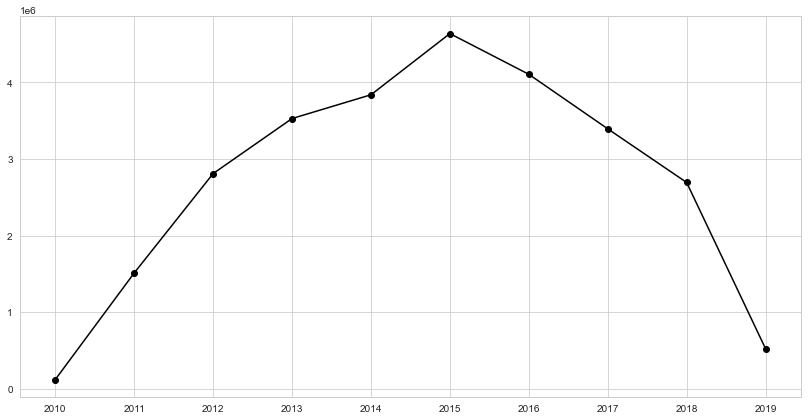

In [42]:
sns.set_style("whitegrid")
#== 
df3=df.groupby('Year',as_index=False).agg({'Review_Length':'sum'})
plt.figure(figsize=(14,7))
plt.plot(df3['Year'] ,df3['Review_Length'],marker='o',label='review length by year',color='black');

There are many reviews in 2015

### Branches Per Year

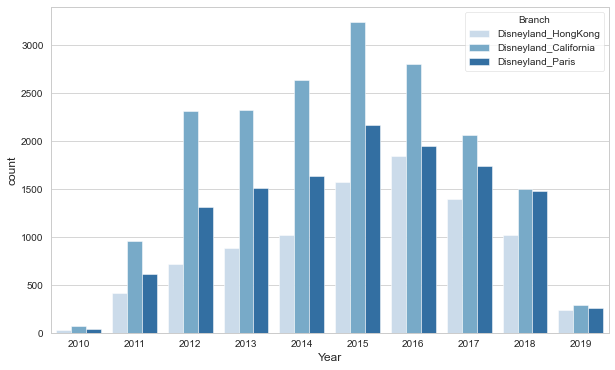

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Year',hue='Branch',palette='Blues');

### Review Length Average

In [44]:
np.median(df['Review_Length'].values)

427.0

## Quarter

<Figure size 720x432 with 0 Axes>

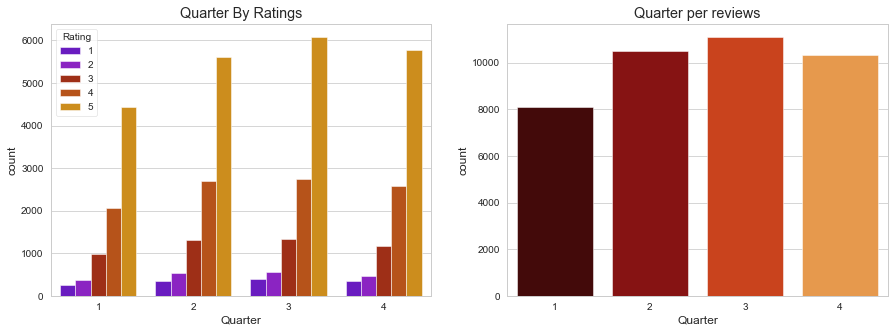

In [45]:
plt.figure(figsize=(10,6));
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False);
sns.countplot(ax=axes[0],data=df,x='Quarter',hue='Rating',palette='gnuplot');
axes[0].set_title('Quarter By Ratings');
sns.countplot(ax=axes[1],data=df,x='Quarter',palette='gist_heat');
axes[1].set_title('Quarter per reviews');
#==

there are less reviews in the first quater of the year

## Country Per Reviews

In [46]:
fig_df=df.groupby('Reviewer_Location',as_index=False).agg({'Branch':'count'}).sort_values('Branch',ascending=False)
fig = px.choropleth(fig_df, 
                    locations='Reviewer_Location', locationmode='country names',
                    color='Branch',
                    color_continuous_scale="portland", hover_data=['Branch'],
                    title='Country - Reviews')
fig.update(layout_coloraxis_showscale=False)
fig.show();

## Country - Low Rating

In [47]:
df4 = df.groupby(['Reviewer_Location'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=True).head(10)
df4.style.background_gradient(cmap="autumn", subset=['Rating'])

In [48]:
## Rating - Year

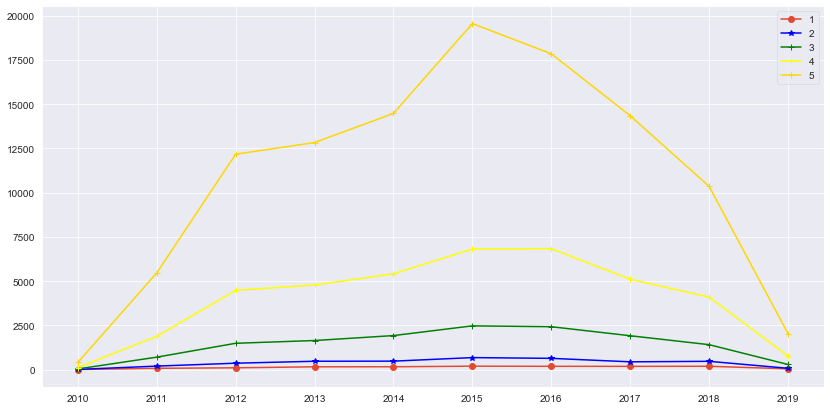

In [49]:
one = df.loc[df['Rating']==1]
one=one.groupby('Year',as_index=False).agg({'Rating':'sum'})
#== 
two = df.loc[df['Rating']==2]
two=two.groupby('Year',as_index=False).agg({'Rating':'sum'})

#== 
three = df.loc[df['Rating']==3]
three=three.groupby('Year',as_index=False).agg({'Rating':'sum'})
#=== 
four = df.loc[df['Rating']==4]
four=four.groupby('Year',as_index=False).agg({'Rating':'sum'})
#===
fifth = df.loc[df['Rating']==5]
fifth=fifth.groupby('Year',as_index=False).agg({'Rating':'sum'})
#============== 
sns.set_style("darkgrid")
plt.figure(figsize=(14,7))
plt.plot(one['Year'] ,one['Rating'],marker='o',label='1') 
plt.plot(two['Year'] , two['Rating'],color='blue',marker='*',label='2')  
plt.plot(three['Year'] ,three['Rating'],color='green',marker='+',label='3') 
plt.plot(four['Year'] ,four['Rating'],color='yellow',marker='+',label='4') 
plt.plot(fifth['Year'] ,fifth['Rating'],color='gold',marker='+',label='5') 
plt.legend();

## Rating - Branch

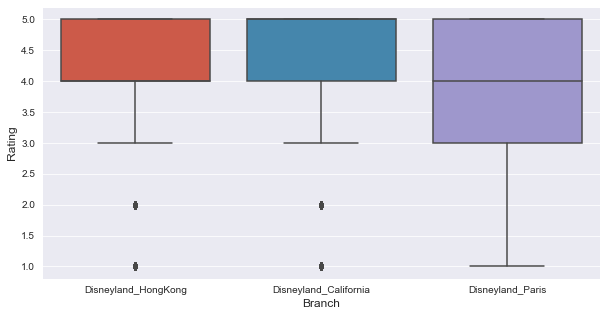

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Branch", y="Rating", data=df);

## Sentiments - Branch

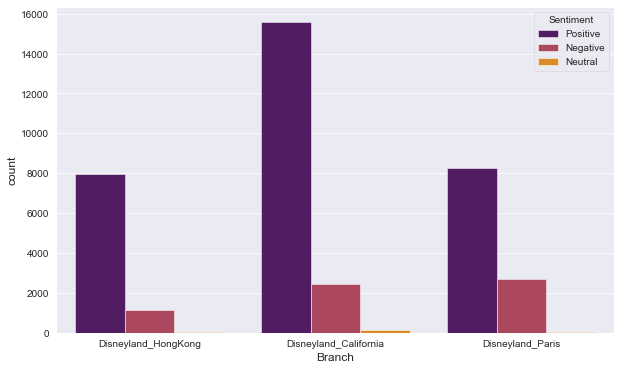

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Branch',hue='Sentiment',palette='inferno');

## Sentiments Percentage - Branch

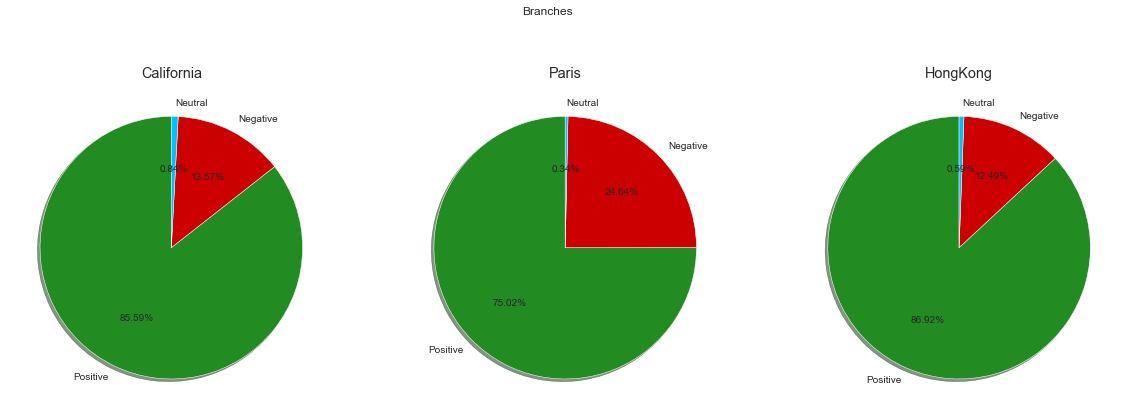

In [52]:
df_cal=df.loc[df['Branch']=='Disneyland_California']
df_par=df.loc[df['Branch']=='Disneyland_Paris']
df_hon=df.loc[df['Branch']=='Disneyland_HongKong']

#===== 
label_cal =df_cal['Sentiment'].value_counts(sort = True).index
size_cal= df_cal['Sentiment'].value_counts(sort = True) 
#=====
label_par =df_par['Sentiment'].value_counts(sort = True).index
size_par= df_par['Sentiment'].value_counts(sort = True) 
#==== 
label_hon =df_hon['Sentiment'].value_counts(sort = True).index
size_hon= df_hon['Sentiment'].value_counts(sort = True)
#===




fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)
fig.suptitle('Branches')
axes[0].pie(size_cal,labels=label_cal,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF']);
axes[0].set_title('California')
axes[1].pie(size_par,labels=label_par,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF']);
axes[1].set_title('Paris');
axes[2].pie(size_hon,labels=label_hon,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF']);
axes[2].set_title('HongKong');

# Sentiment in Reviews

## All

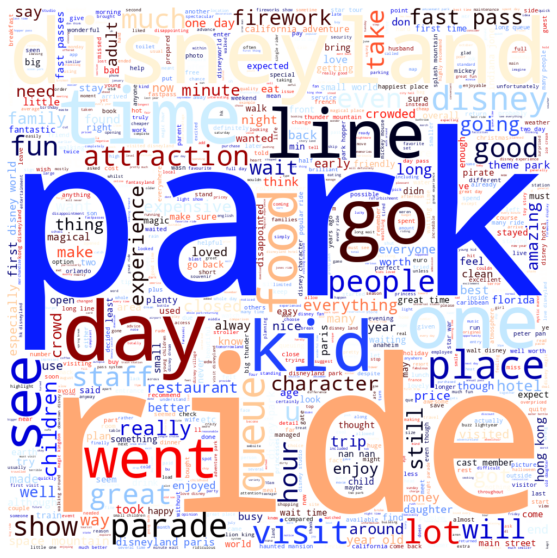

In [53]:
df['Reviews_Text']=df['Reviews_Text'].astype('str')
Reviews_Text = " ".join(txt for txt in df.Reviews_Text)

#== 
wc = WordCloud(background_color='white',  mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='black',colormap='flag')
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
#plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

## Positive

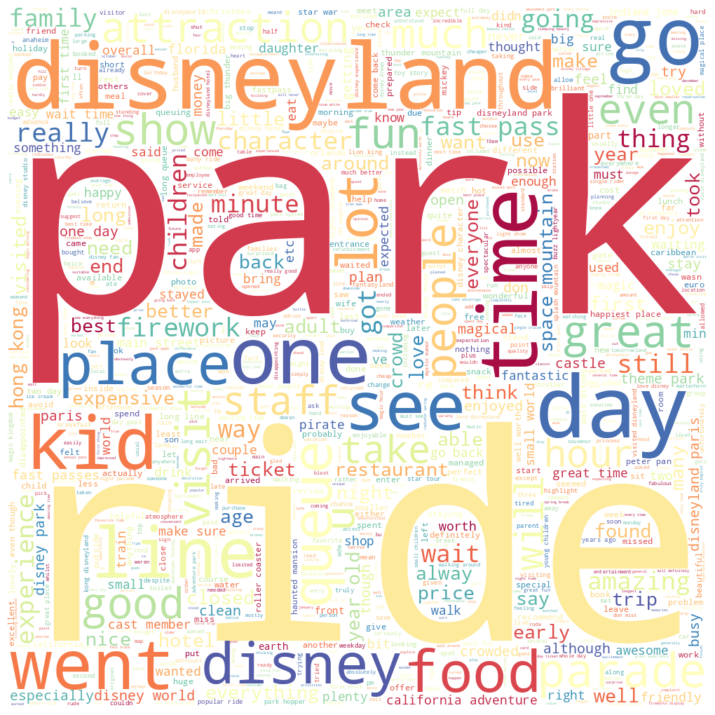

In [54]:
df_like=df.loc[df['Sentiment']=='Positive']
#===
Reviews_Text = " ".join(insul for insul in df_like.Reviews_Text)

#== 
wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

## Negative

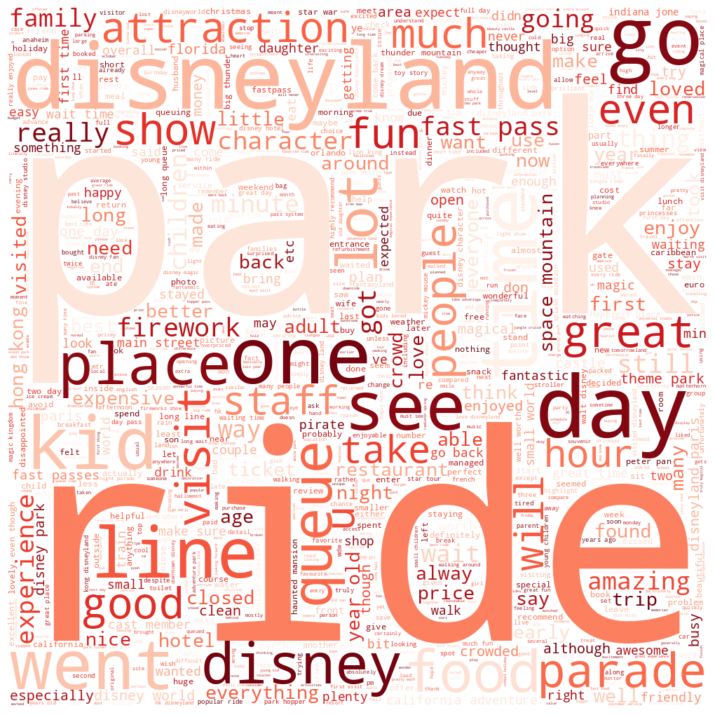

In [55]:
df_dislike=df.loc[df['Sentiment']=='Negative']
#===
Reviews_Text = " ".join(insul for insul in df_like.Reviews_Text)

#== 
wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='red',colormap='Reds')
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

# Words in Negative Reviews

## Reviews Words Segmentation

In [56]:
df_dislike.head()

index  Rating Reviewer_Location  \
5       5       3         Singapore   
8       8       2         Australia   
15     15       3    United Kingdom   
17     17       3    United Kingdom   
29     29       3         Australia   

                                          Review_Text               Branch  \
5   Have been to Disney World, Disneyland Anaheim ...  Disneyland_HongKong   
8   Feel so let down with this place,the Disneylan...  Disneyland_HongKong   
15  We brought tickets before we left and got 2 da...  Disneyland_HongKong   
17  Around   60 per person and if you want to eat ...  Disneyland_HongKong   
29  I need to say I have been to    home of Disney...  Disneyland_HongKong   

    Year  Month  Quarter  Review_Length Sentiment  \
5   2019      4        2            966  Negative   
8   2019      4        2            563  Negative   
15  2019      1        1            509  Negative   
17  2019      4        2            413  Negative   
29  2019      4        2           1504  Negative   

                                         Reviews_Text  
5   have been to disney world disneyland anaheim a...  
8   feel so let down with this place the disneylan...  
15  we brought tickets before we left and got 2 da...  
17  around 60 per person and if you want to eat or...  
29  i need to say have been to home of disney disn...

In [57]:
review = df_dislike['Reviews_Text'].drop_duplicates()

all_sentences = []

for word in review:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)
#== 
import re

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
#== 
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
#== 

nlp = spacy.load('en_core_web_lg')
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#== 
df = pd.DataFrame(stem2)
df = df[0].value_counts()
#== 
df = df[:20,]
#== 
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
#====== 
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
#======
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000
#=====
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

In [58]:
df6['Entity'].value_counts()
negative= df6.groupby(['Entity']).size().to_frame('count').reset_index()
negative.sort_values(by='count', ascending=False)[:10]
fig = px.pie(negative, values='count', names='Entity')
fig.show()

Time and Dates words constitute 40 % of words in negative reviews texts

## Time Words

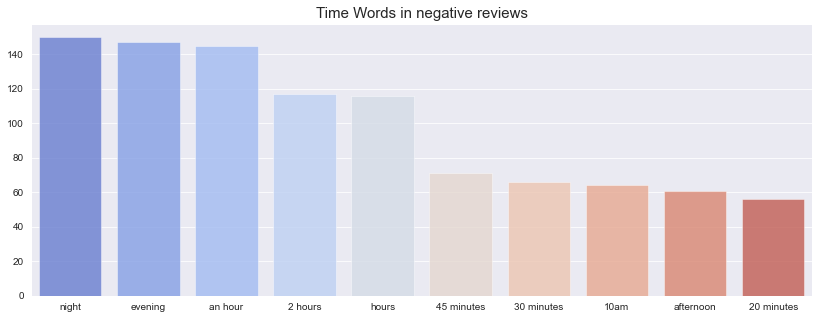

In [59]:
TIME = df6.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="coolwarm");
plt.title('Time Words in negative reviews',fontsize=15);
plt.show();

Making visitors waits about one hour or more drives them to write negative reviews

In [71]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('an hour'))
df_don=df_copy.loc[df_copy['check']>0]
print(df_don['Review_Text'].values[3:4])
print('\n')
print(df_don['Review_Text'].values[4:5])
print('\n')
print(df_don['Review_Text'].values[47:48])

["My adult son and I had a wonderful day in Dec 2018. We are bid Disney fans. We went to China to complete his around the world Disneyland parks by going to Hong Kong and Shanghai. This park like all Disney operation was clean, well laid out, great service and well worth the money. Don't expert a mirror of LA. Plenty of people speak English at least enough to point you in the right direction. Rides were great, food selection is extensive and night activities are well done. It is a long subway ride from Hong Kong then a pretty long walk to front gate. IMPORTANT TIP do not take in any kinds of bags or purses. Put whatever you need in your pockets. It will save you an hour getting in as security lines are very long but the line for people without them basically walk right in."]


['Went to HK Disneyland last 17th December 2018 with my wife and 3.5 year old son. Even if it   s not our first time anymore, that magical happy feeling is still palpable.We arrived 10:30AM and as expected, we in

## Name Words

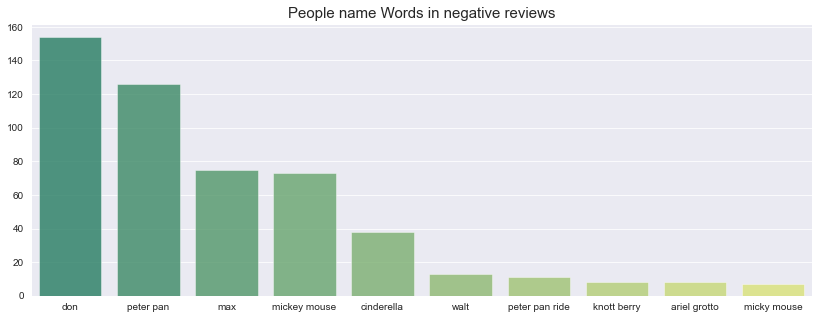

In [60]:
PERSON = df6.query("Entity == 'PERSON'")
PERSON =PERSON['Word'].value_counts()
PERSON = PERSON[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=PERSON.index,y= PERSON.values, alpha=0.8,palette="summer");
plt.title('People name Words in negative reviews',fontsize=15);
plt.show();

Peter Pan has highest negative reviews

In [61]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('peter pan'))
df_don=df_copy.loc[df_copy['check']>0]
print(df_don['Review_Text'].values[3:4])
print('\n')
print(df_don['Review_Text'].values[4:5])
print('\n')
print(df_don['Review_Text'].values[47:48])

['Always a fun experience. Always amazed at how busy peter pan is?!?!?!? I am not sure what I missed riding it. I mean the ride is fun but 2 hours in line is a lot.']


['Let me start off by saying I was in Cali with my family visiting so disney was not the destination but we decided to take the kids. We went on Monday 3 7 during the afternoon. It was not crowded we actually got to go on every ride that was...open!There are alot of rides closed that they do not tell you about on the website and dont bother calling either because you wont find out that way. We did however enjoy the rides we got to go on. The peter pan ride was the highlight of my visit its worth the line wait. The food and drink price are what you expect of an amusement park so it didnt seem over the top expensive to me just what I would expect being at an amusement park. The workers seemed nice I really didnt interact with them that much except to ask where certain rides were and they were helpful. It did start to get 

Visitors of Disneyland California complain about the length of the queues for Peter Pan's game


Visitors of Disneyland Paris Complain about the shut of peter pan game

## Ordinal Words

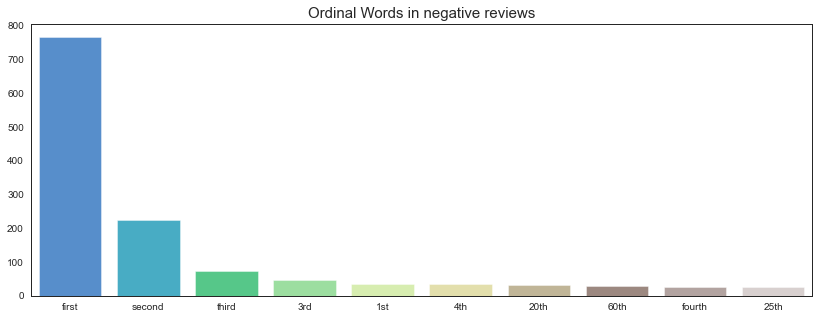

In [62]:
ORDINAL = df6.query("Entity == 'ORDINAL'")        
ORDINAL =ORDINAL['Word'].value_counts()
ORDINAL = ORDINAL[:10]
sns.set_style("white")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=ORDINAL.index,y= ORDINAL.values, alpha=0.8,palette="terrain");
plt.title('Ordinal Words in negative reviews',fontsize=15);
plt.show();

## Organisation Words

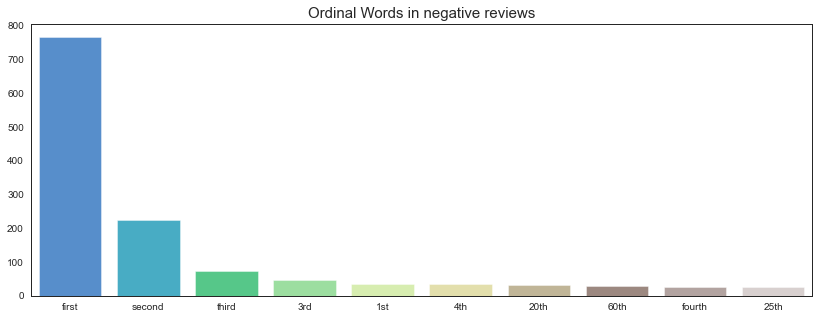

In [63]:
ORDINAL = df6.query("Entity == 'ORDINAL'")        
ORDINAL =ORDINAL['Word'].value_counts()
ORDINAL = ORDINAL[:10]
sns.set_style("white")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=ORDINAL.index,y= ORDINAL.values, alpha=0.8,palette="terrain");
plt.title('Ordinal Words in negative reviews',fontsize=15);
plt.show();

Indiana Jones have high negative reviews

In [64]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('indiana jones'))
df_don=df_copy.loc[df_copy['check']>0]
print(df_don['Review_Text'].values[31:32])
print('\n')
print(df_don['Review_Text'].values[7:8])
print('\n')
print(df_don['Review_Text'].values[20:21])

['No where near the Orlando disney park, but if you have kids and don   t know what to do they might enjoy it!Few tips to maximize the outcome of your visit:1. Stick to disneyland park. The Universal studios is a no no. Not worth the ticket and nothing much to do. Few rides and I think it only has the Aero Smith ride. Others are complete waste of time.2. Try to go in weekdays and low season. The prices of tickets can be 50% cheaper.3. Don   t be fouled with the Super Magic plus. It absolutely means nothing and no privileges except you paid more for your tickets.4. Maximize the use of the fast pass. You can register for a fast pass and wait go for other ride. That will save you time and make you avoid long ques.5. Expect long waiting times for major rides (80 100 minutes). You need to be smart in planning you fast pass.6. Highly recommend the star wars ride and indiana jones for adults.Wish you all a pleasant visit to Disneyland paris and I will be glad to answer questions if any.']


[

This game is really special, although it was mentioned in negative reviews but still recommended by visitors

## Nation Words

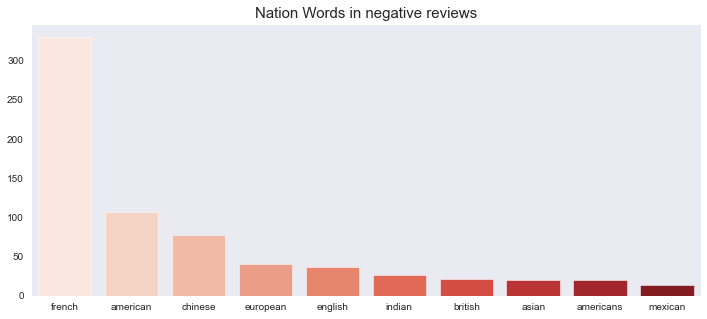

In [65]:
NORP = df6.query("Entity == 'NORP'")        
NORP =NORP['Word'].value_counts()
NORP = NORP[:10]
sns.set_style("dark")
plt.figure(figsize=(12,5));
NORP = sns.barplot(x=NORP.index,y= NORP.values, alpha=1,palette="Reds");
plt.title('Nation Words in negative reviews',fontsize=15);
plt.show();

French has highest negative reviews

In [66]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('french'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Negative']
print(df_don['Review_Text'].values[51:52])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[20:21])

['This was our thrid trip (and most definitely final) trip to Disneyland Paris. Whereas previous trips have been spoiled by aggresive french pushing past to get to the front of the queue this was not the case this time. Rather the problems were that a lot of the attractions were closed and why does no one stop the locals from smoking in the queue, despite asking for them to put cigarettes out we were ignored! I complained to staff and was met with a shrug of the shoulders. WDW has rules and etiquette, which is there to make the trip comfortable for all. Disneyland Paris does not seem to have the same consideration. We had dinner in the Blue Lagoon Restaurant, really lovely food VERY EXPENSIVE and the service was slow but the food more than made up for it. The rides that were open were good, my favourite is the Tower of Terrors.']


['I adore this place. It   s my happy place. So I am a tad bias. Best time to go is the week after Halloween. It   s not quite sorted for Christmas but you 

foreign visitors to Disney Land Paris faces some issues with french language

## Location Words

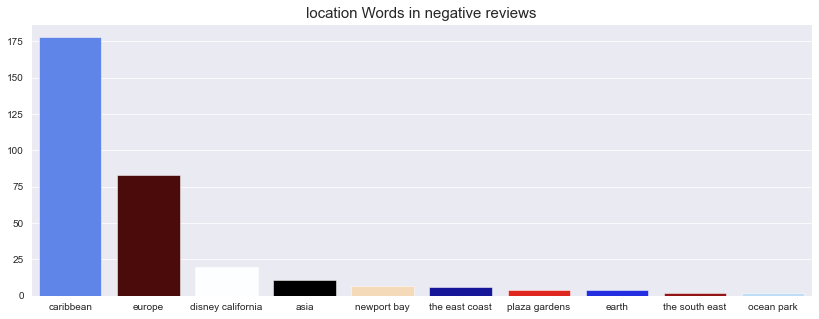

In [67]:
LOC = df6.query("Entity == 'LOC'")        
LOC =LOC['Word'].value_counts()
LOC = LOC[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
NORP = sns.barplot(x=LOC.index,y= LOC.values, alpha=1,palette="flag");
plt.title('location Words in negative reviews',fontsize=15);
plt.show();

Pirates of the Carribean has highest negative reviews

In [68]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('caribbean'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Negative']
print(df_don['Review_Text'].values[1:2])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[6:7])

['First stepping into Disneyland was brilliant, the way everything is set out and all the buildings are great to look at. We decided to go early and have breakfast, we were looking around for almost an hour with not much luck. As a vegan or even just somebody wanting to eat anything other than burgers, hotdogs, fries, donuts or waffles then the food choices are very poor. You would think they might want to have healthier options for children as well. Bigger resturants wanted 35 euro each for a buffet style breakfast, some were not even open. I ended up with a plain salad and fries for breakfast then didnt eat the rest of the day. We asked to go into a resturant for a drink as we had been walking around all day and they just said no, you cant just have a drink here you need to eat as well. Then walking around a lot of the rides were closed, long wait on the ones that were open, then we qued for over half an hour for pirates of the caribbean then to just be told its not working at the mo

Seems that Pirates of the Caribbean had a lot of breakdowns

## Money Words

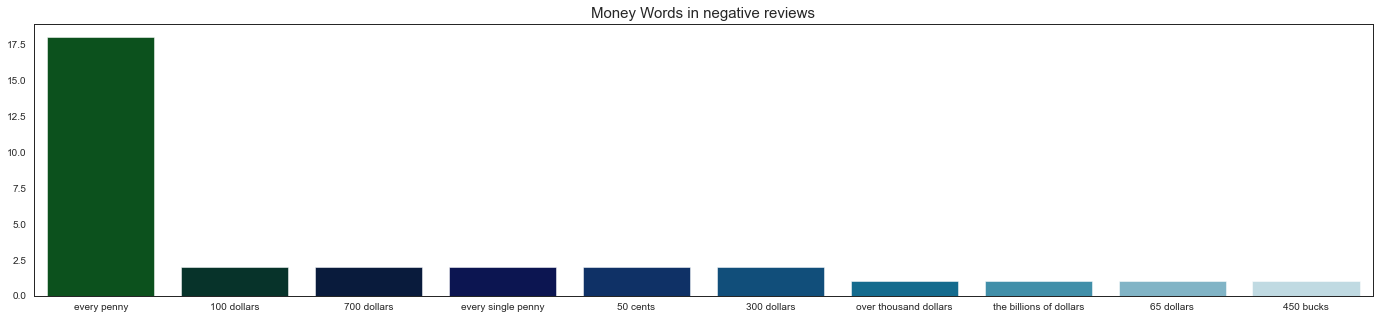

In [69]:
PRODUCT = df6.query("Entity == 'MONEY'")        
PRODUCT =PRODUCT['Word'].value_counts()
PRODUCT = PRODUCT[:10]
sns.set_style("white")
plt.figure(figsize=(24,5));
NORP = sns.barplot(x=PRODUCT.index,y= PRODUCT.values, alpha=1,palette="ocean");
plt.title('Money Words in negative reviews',fontsize=15);
plt.show();

In [73]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('every penny'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Negative']
print(df_don['Review_Text'].values[1:2])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[6:7])

['We were there on Sunday 3 18 and it was not crowded!! I was worried it would be packed due to spring break...Cannot stress enough that the fast pass max pass is worth every penny. Also, the Disney app is awesome for tracking wait times, passes, pictures   love it! And it seems like they have improved it as it didn   t crash or drain my battery this time.']


["I feel like a kid again once I step foot past the Disneyland welcome sign! Rides and atmosphere never gets old. My family and I are headed here in less than two weeks. Only downside I see...pricing is outrageous! Park tickets and food pricing are going crazy. But seeing the smile on my son's face makes it worth every penny. "]


["We took our daughters 11 and 19. and spent the day roaming the park spending lots of money. Everything is overpriced, but just pretend it's Vegas and you are throwing money down a slot machine. The kiddos will never forget it. Even my 19 year old daughter enjoyed taking photos with the Disney princess